In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
test = pd.read_csv('../raw_data/test.csv')
data = pd.read_csv('../raw_data/train.csv')

In [4]:
[int(x/data.shape[0] * 100) for x in data.Survived.value_counts()]

[61, 38]

In [28]:
((data[data['Sex'] == 'male'][data['Pclass'] == 1]['Survived'].sum() /
 data[data['Sex'] == 'male'][data['Pclass'] == 1].shape[0] * 100) + (
     data[data['Sex'] == 'male'][data['Pclass'] == 2]['Survived'].sum() /
     data[data['Sex'] == 'male'][data['Pclass'] == 2].shape[0] * 100) + (
         data[data['Sex'] == 'male'][data['Pclass'] == 3]['Survived'].sum() /
         data[data['Sex'] == 'male'][data['Pclass'] == 3].shape[0] * 100)) / 3

/tmp/ipykernel_697/697995920.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ((data[data['Sex'] == 'male'][data['Pclass'] == 1]['Survived'].sum() /
/tmp/ipykernel_697/697995920.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Sex'] == 'male'][data['Pclass'] == 1].shape[0] * 100) + (
/tmp/ipykernel_697/697995920.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Sex'] == 'male'][data['Pclass'] == 2]['Survived'].sum() /
/tmp/ipykernel_697/697995920.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Sex'] == 'male'][data['Pclass'] == 2].shape[0] * 100) + (
/tmp/ipykernel_697/697995920.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Sex'] == 'male'][data['Pclass'] == 3]['Survived'].sum() /
/tmp/ipykernel_697/697995920.py:6: UserWarning: Boolean Series key will be reindexed to 

22.05688507675878

In [33]:
data[data['Sex'] == 'male'].Survived.sum() / 577

0.18890814558058924

In [6]:
survival_rate = data.groupby(['Sex']).mean()[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

,Survived
Sex,
female,0.742038
male,0.188908


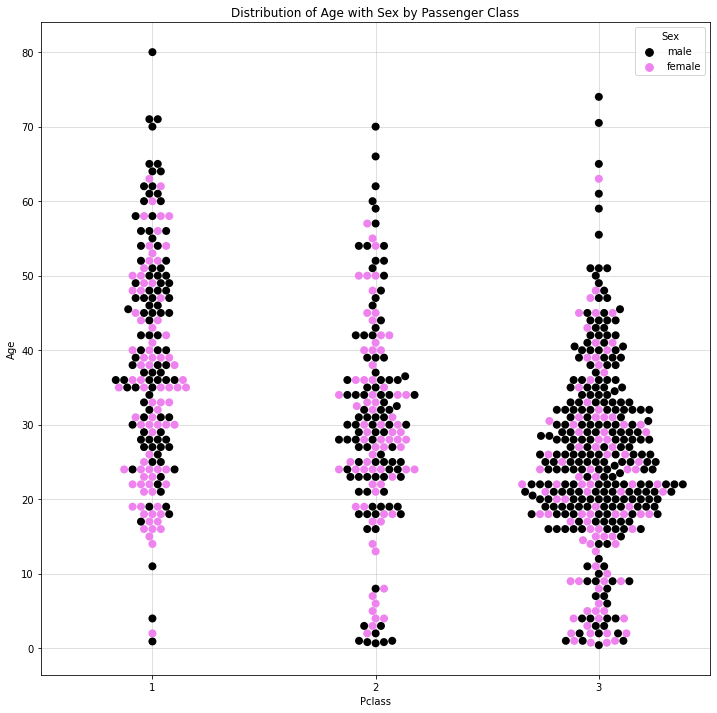

In [4]:
plt.figure(figsize=(12, 12))
sns.swarmplot(data=data,
              x='Pclass',
              y='Age',
              hue='Sex',
              size=8,
              palette=[
                  'black', 'violet'
              ]).set(title='Distribution of Age with Sex by Passenger Class')
plt.grid(alpha=.5)

In [80]:
np.mean(data.Survived)

0.3838383838383838

In [106]:
s = pd.DataFrame()

In [116]:
round(np.mean(data[(data.Pclass == 1) & (data.Sex =='female')].Survived), 2)

0.97

In [5]:
def get_survival_rate_per_sex_and_class():
    li = []
    for x in [1, 2, 3]:
        #temp = []
        li.append(
            round(
                np.mean(data[(data.Pclass == x)
                             & (data.Sex == 'female')].Survived), 2))
        li.append(
            round(
                np.mean(data[(data.Pclass == x)
                             & (data.Sex == 'male')].Survived), 2))
        #li.append(temp)
    return pd.DataFrame({
        'Class' : [1,1,2,2,3,3],
        'Survived': li,
        'Sex': ['female', 'male', 'female', 'male', 'female', 'male']
    })

sex_class_survival = get_survival_rate_per_sex_and_class()

In [6]:
sex_class_survival

,Class,Survived,Sex
0,1,0.97,female
1,1,0.37,male
2,2,0.92,female
3,2,0.16,male
4,3,0.50,female
5,3,0.14,male


([<matplotlib.axis.XTick at 0x7fae05056c40>,
 [Text(0.75, 0, '0.75'), Text(1.0, 0, '1.00'), Text(1.25, 0, '1.25')])

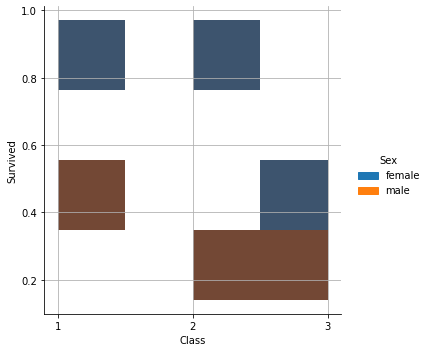

In [211]:
sns.displot(data = sex_class_survival, x = 'Class', y = 'Survived', hue = 'Sex')
plt.grid()
plt.xticks(np.arange(1,4, 1))

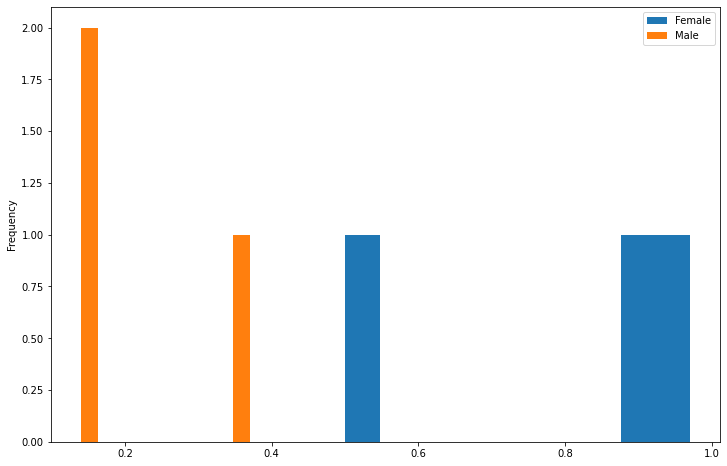

In [177]:
plt.figure(figsize=(12,8))
sex_class_survival.iloc[0,:].plot(kind='hist')
sex_class_survival.iloc[1,:].plot(kind='hist')
plt.legend()

In [151]:
sex_class_survival.iloc[0,:].values

array([0.97, 0.92, 0.5 ])

In [94]:
np.mean(data[(data.Pclass == 3) & (data.Sex =='female')].Survived)

0.5

In [85]:
np.mean(data[(data.Parch > 0) & (data.SibSp > 0)].Survived)

0.43661971830985913

In [74]:
data[data.Ticket.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [51]:
for x in data.select_dtypes(int).columns:
    print(x)

PassengerId
Survived
Pclass
SibSp
Parch


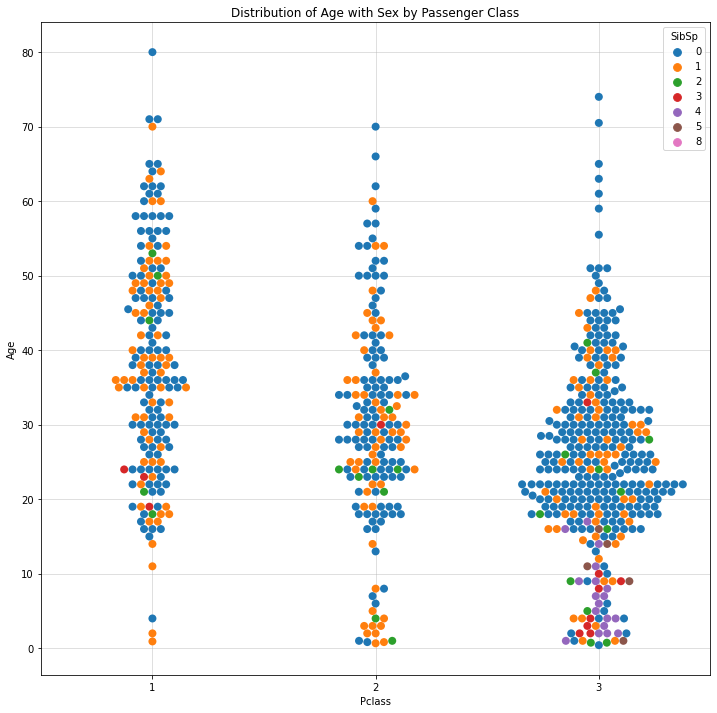

In [59]:
plt.figure(figsize=(12, 12))
sns.swarmplot(data=data,
              x='Pclass',
              y='Age',
              hue='SibSp',
              size=8).set(title='Distribution of Age with Sex by Passenger Class')
plt.grid(alpha=.5)

In [8]:
class_survival_rate = data.groupby(['Pclass']).mean()[['Survived']]

In [55]:
class_survival_rate

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [6]:
survival_rate

,Survived
Sex,
female,0.742038
male,0.188908


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

<AxesSubplot:xlabel='Sex', ylabel='Count'>

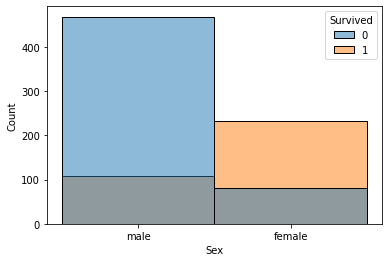

In [78]:
sns.histplot(data = data, x = 'Sex', hue = 'Survived')

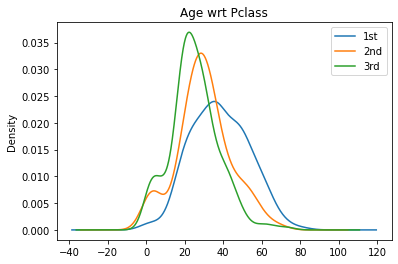

In [41]:
for x in [1,2,3]:
    data.Age[data.Pclass == x].plot(kind="kde")
    
plt.title("Age wrt Pclass")
plt.legend(("1st","2nd","3rd"))

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

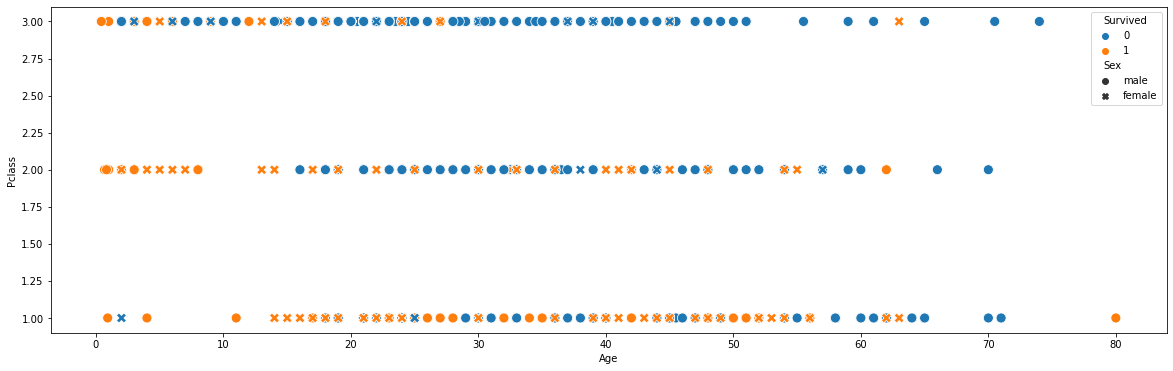

In [19]:
plt.figure(figsize=(20,6))
sns.scatterplot(data = data, y = 'Pclass', x = 'Age', hue='Survived', style='Sex', s = 100)

In [9]:
from scipy.stats import gaussian_kde

In [10]:
kernel = gaussian_kde(data.Survived)

In [18]:
kernel.covariance

array([[0.01564515]])

# Feature Engineering

In [8]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

# Null hypothesis

In [215]:
sample = data.sample(n=150, random_state=100)

<AxesSubplot:ylabel='Frequency'>

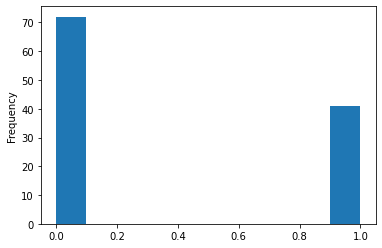

In [222]:
sample[sample.Parch == 0].Survived.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

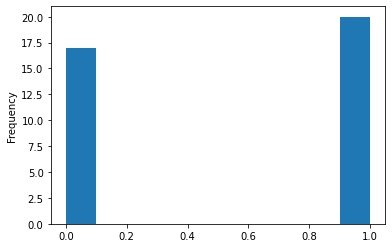

In [221]:
sample[sample.Parch > 0].Survived.plot(kind='hist')

In [223]:
from scipy.stats import t
rv = t(df=100-2)